# Project Dublin Bus：Predict Travel Time for Dublin Bus  --Team ETA 


##  Modeling for one week's data 


In the notebook, the task is to train different models with one week's data which has been cleaned by our data cleaning process 

The main models we are using in the notebook are from Sklearn package: 

-Linear Regression 

-Random Forest: RF Regressor

-SVM: Epsilon-Support Vector Regression

-Neural network model: MLPRegressor



## Read data file to data frame  and check the first and last 5 rows 

In [1]:
#  import those package for modeling 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
# Read data file to data frame 
%time df_all = pd.read_csv('dublin_2012_week1_distance.csv',dtype={ 'Journey_Pattern_ID': object})

CPU times: user 8.62 s, sys: 1.17 s, total: 9.79 s
Wall time: 9.99 s


In [3]:
# Check dataframe first 5 row data 
df_all.head()

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Stop_ID,At_Stop,First_Stop,Last_Stop,...,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
0,1352204113,00010001,2012-11-06,5427,-6.262000,53.391182,226,1,226,380,...,0,2012-11-06 12:15:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
1,1352204473,00010001,2012-11-06,5427,-6.262341,53.391186,226,0,226,380,...,360,2012-11-06 12:21:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
2,1352204510,00010001,2012-11-06,5427,-6.259799,53.391804,228,1,226,380,...,397,2012-11-06 12:21:50,12,Tuesday,0,am,6.88,0.0,7.55,16.25
3,1352204531,00010001,2012-11-06,5427,-6.259056,53.391758,228,0,226,380,...,418,2012-11-06 12:22:11,12,Tuesday,0,am,6.88,0.0,7.55,16.25
4,1352204553,00010001,2012-11-06,5427,-6.256530,53.391335,229,1,226,380,...,440,2012-11-06 12:22:33,12,Tuesday,0,am,6.88,0.0,7.55,16.25


In [4]:
# Check last 5 rows 
df_all.tail(3)

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Stop_ID,At_Stop,First_Stop,Last_Stop,...,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
2209399,1352536987,PP071001,2012-11-10,12869,-6.260572,53.350132,279,1,3222,4962,...,2640,2012-11-10 08:43:07,8,Saturday,1,am,3.75,0.0,4.96,10.25
2209400,1352537007,PP071001,2012-11-10,12869,-6.260678,53.350342,279,0,3222,4962,...,2660,2012-11-10 08:43:27,8,Saturday,1,am,3.75,0.0,4.96,10.25
2209401,1352537333,PP071001,2012-11-10,12869,-6.256516,53.356998,4962,1,3222,4962,...,2986,2012-11-10 08:48:53,8,Saturday,1,am,3.75,0.0,4.96,10.25


In [5]:
# Check all the Journey_Pattern_ID unique value 
df_all['Journey_Pattern_ID'].unique()

array(['00010001', '00010002', '00010003', '00011001', '00011002',
       '00040001', '00040002', '00041001', '00041002', '00070001',
       '00070002', '00070003', '00071001', '00071002', '00080001',
       '00081001', '00090001', '00090002', '00091001', '00091002',
       '00110001', '00110002', '00111001', '00111002', '00130001',
       '00130002', '00130003', '00130004', '00130005', '00130006',
       '00130007', '00130008', '00131001', '00131002', '00131003',
       '00131004', '00131005', '00131007', '00131008', '00131009',
       '00131010', '00131012', '00140001', '00141001', '00141003',
       '00150001', '00150002', '00151001', '00151002', '00160001',
       '00160002', '00160003', '00160004', '00161001', '00170001',
       '00170002', '00170003', '00170004', '00170005', '00171001',
       '00171002', '00171003', '00171004', '00180001', '00181001',
       '00181002', '00250001', '00251001', '00260001', '00261001',
       '00270001', '00270002', '00270003', '00271001', '002710

In [7]:
#Drop Error Journery Pattern 
df_all.drop(df_all.index[df_all['Journey_Pattern_ID']=='OL77X101'],inplace=True)
df_all.drop(df_all.index[df_all['Journey_Pattern_ID']=='PP071001'],inplace=True)

## For all those models, train with only one  Journey_Pattern_ID data first 

In this part, we tried many different Journey_Pattern_ID, and only show 00010001 as an example 

### Get one Journey_Pattern_ID data 

In [8]:
# Use loc to get the one Journey_Pattern_ID data from the whole data set 
df=df_all.loc[df_all['Journey_Pattern_ID']=='00010001']
df.reset_index(drop=True, inplace=True)

In [9]:
# Check the one Journey_Pattern_ID data size 
df.shape

(9575, 21)

## Train Data set with statsmodels linear regression 

In [10]:
# Check data set size 
df.shape

(9575, 21)

In [11]:
# Get those features which are using to train the models 
feature_cols = ['Distance','midweek','HourOfDay']
X = df[feature_cols]
y = df['Trip_Time']
X.columns


Index(['Distance', 'midweek', 'HourOfDay'], dtype='object')

In [12]:
# Train the data set with  statsmodels
import statsmodels.formula.api as sm
df_linear = pd.concat([X, y], axis=1)
lm = sm.ols(formula = "Trip_Time ~ Distance+HourOfDay+midweek", data=df_linear).fit()

In [13]:
# Check the model parameters 
lm.params

Intercept    385.811233
Distance       0.238069
HourOfDay    -16.182614
midweek     -131.703135
dtype: float64

In [14]:
# Check the summary of the linear regression model 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Trip_Time   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 3.640e+04
Date:                Sun, 20 Aug 2017   Prob (F-statistic):               0.00
Time:                        10:55:22   Log-Likelihood:                -66715.
No. Observations:                9575   AIC:                         1.334e+05
Df Residuals:                    9571   BIC:                         1.335e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    385.8112     10.481     36.810      0.000     365.266     406.356
Distance       0.2381      0.001    329.718      0.000       0.237       0.239
HourOfDay    -16.1826      0.626    -25.837      0.000     -17.410     -14.955
midweek     -131.7031      7.051    -18.679      0.000    -145.524    -117.882
==============================================================================
Omnibus:                      764.173   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2483.347
Skew:                           0.392   Prob(JB):                         0.00
Kurtosis:                       5.369   Cond. No.                     2.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Get the predict of train data set 
lm_predictions = lm.predict(X)

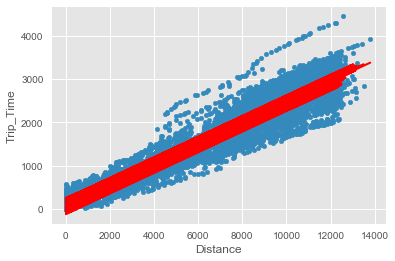

In [16]:
# Plot the pridiction of target feature with the real data 
df.plot(kind='scatter', x='Distance', y='Trip_Time')
plt.plot(X['Distance'], lm_predictions, c='red', linewidth=2)

#plt.savefig('SM_Linear_Reg.png')

In [17]:
# Print the confidence interval of the fitted parameters
lm.conf_int()

,0,1
Intercept,365.266192,406.356273
Distance,0.236653,0.239484
HourOfDay,-17.410369,-14.954859
midweek,-145.524450,-117.881819


In [18]:
# MSE: Mean Squared Error of prediction to real traget feature 
mse=((df_linear.Trip_Time-lm.predict(df_linear))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 65996.0526352


In [19]:
# MAE:  Mean Absolute mean of prediction to real traget feature 
mae = abs(df_linear.Trip_Time-lm.predict(df_linear)).mean()
print("Mean Absolute mean ",mae)

Mean Absolute mean  192.174083032


## Use an sklearn model LinearRegression to train data set 

In [20]:
# Import the modules from sklearn package 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [21]:
# Get those features which are using to train the models 
feature_cols = ['Distance','midweek','HourOfDay']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

Index(['Distance', 'midweek', 'HourOfDay'], dtype='object')

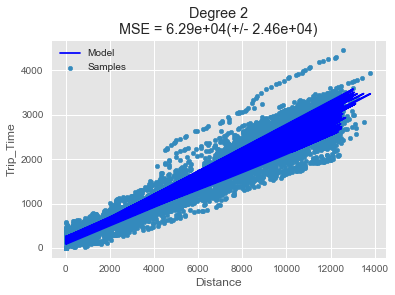

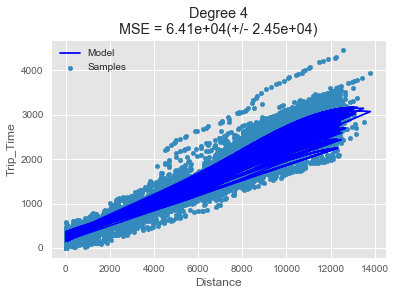

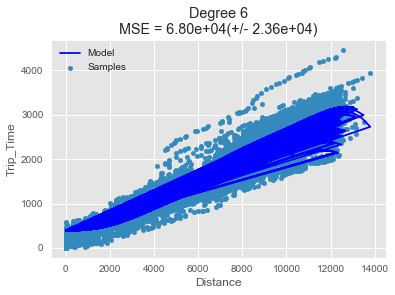

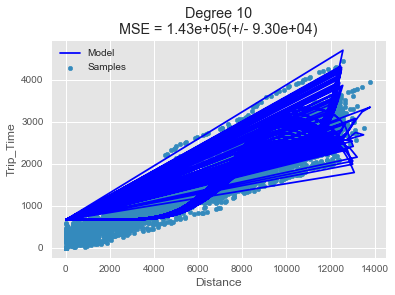

In [22]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
# Using pipeline to use PolynomialFeatures in linear regression to check how to get the best fitting to the data set 

degrees = [2,4,6,10]

#plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X, y)
    scores = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)

    df.plot(kind='scatter', x='Distance', y='Trip_Time',label="Samples")
    plt.plot(X['Distance'], pipeline.predict(X), c='Blue', label="Model")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
    plt.show()

### Result comparison 
From the result before, we could see that when the degree=2, the fitting result is the best 

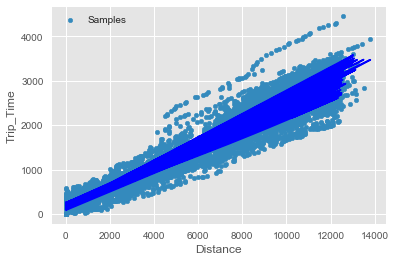

In [23]:
# Train the data set with PolynomialFeatures when degree = 2
polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X, y)

df.plot(kind='scatter', x='Distance', y='Trip_Time',label="Samples")
plt.plot(X['Distance'], pipeline.predict(X), c='Blue', label="Model")

#plt.savefig('Linear_Reg_Poly.png')

In [24]:
# Check the parameter of the linear refression 
pipeline.named_steps['linear_regression'].get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [25]:
# Check the score of the model 
pipeline.score(X,y)

0.9260311627143113

In [26]:
# MSE: Mean Squared Error
mse=((y-pipeline.predict(X))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 60585.2268643


In [27]:
# MAE:  Mean Absolute Error 
mae = abs(y-pipeline.predict(X)).mean()
print("Mean Absolute Error ",mae)

Mean Absolute Error  180.694803253


# Train data set with SVM 

In [30]:
#Import SVM and assign to a model 
from sklearn import svm
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
clf = svm.SVR()

In [31]:
# Prepare the descriptive features
X = pd.concat([df[['Distance','midweek','HourOfDay']]], axis=1)
y = df.Trip_Time 

#print("Descriptive features:\n", X)
#print("\nTarget feature:\n", y)

In [32]:
# Train the model 
%time clf.fit(X, y)

CPU times: user 2.05 s, sys: 139 ms, total: 2.19 s
Wall time: 2.24 s


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

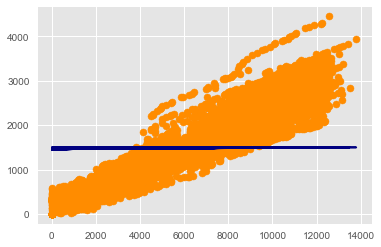

In [35]:
# Get the predicetion and plot the distance and trip_time of the data and prediction 
y_rbf = clf.predict(X)
plt.scatter(X['Distance'], y, color='darkorange', label='data')
plt.plot(X['Distance'], y_rbf, color='navy', label='RBF model')

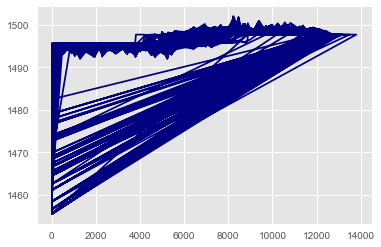

In [38]:
# As the plot before couldn't show the result well, we plot the prediction directly
#Plot the distance and trip_time of prediction 
plt.plot(X['Distance'], y_rbf, color='navy', label='RBF model')
plt.show()

In [34]:
# Check the Score of the model 
clf.score(X,y)

-0.006278936646301192

In [62]:
# MSE: Mean Squared Error
mse=((y-y_rbf)**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 824207.056682


In [63]:
# MAE:  Mean Absolute Error 
mae = abs(y-y_rbf).mean()
print("Mean Absolute Error ",mae)

Mean Absolute Error  787.860747745


# Train Data with Neural network model 

In [39]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
# Import MLPRegressor from sklearn.neural_network 
from sklearn.neural_network import MLPRegressor 
mlpreg=MLPRegressor()

In [40]:
# Prepare the descriptive features
X = pd.concat([df[['Distance','midweek','HourOfDay']]], axis=1)
y = df.Trip_Time 

#print("Descriptive features:\n", X)
#print("\nTarget feature:\n", y)

In [41]:
# Train the data with MLP Regressor 
mlpreg.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

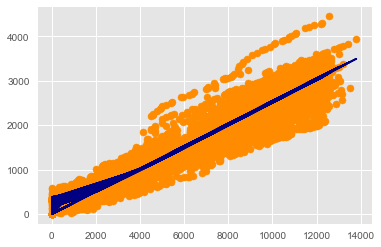

In [43]:
# Get the predicetion and plot the distance and trip_time of the real data and prediction 
y_mlpreg = mlpreg.predict(X)
plt.scatter(X['Distance'], y, color='darkorange', label='data')
plt.plot(X['Distance'], y_mlpreg, color='navy', label='ANN model')
#plt.savefig('ANN_result.png')

In [42]:
# Check the model score 
mlpreg.score(X,y)

0.91274259593949403

In [44]:
# MSE: Mean Squared Error   
# Mean Squared Error of linear: 131771.970239 
mse=((y-mlpreg.predict(X))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 71469.4162377


In [45]:
# MAE:  Mean Absolute Error 
# Mean Absolute Error  of linear:  253.761443277
mae = abs(y-mlpreg.predict(X)).mean()
print("Mean Absolute Error ",mae)

Mean Absolute Error  193.840212505


# Train data set with Random Forest 

In [46]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
#from sklearn.multioutput import MultiOutputRegressor

In [52]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#sklearn.ensemble.RandomForestRegressor
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth,random_state=2)

In [53]:
# Prepare the descriptive features
X = pd.concat([df[['Distance','midweek','HourOfDay']]], axis=1)
y = df.Trip_Time 

#print("Descriptive features:\n", X)
#print("\nTarget feature:\n", y)

In [54]:
regr_rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [55]:
regr_rf.score(X,y)
#0.94701267864972594

0.986126164382225

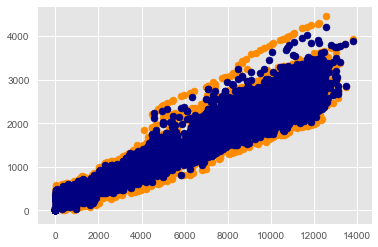

In [59]:
# Get the predicetion 
y_regr_rf = regr_rf.predict(X)
plt.scatter(X['Distance'], y, color='darkorange', label='data')
plt.scatter(X['Distance'], y_regr_rf, color='navy', label='MRF model')
plt.savefig('MRF_result.png')

In [61]:
# MSE: Mean Squared Error   
# Mean Squared Error of linear: 131771.970239 
mse=((y-y_regr_rf)**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 11363.5621327


In [60]:
# MAE:  Mean Absolute Error 

# Mean Absolute Error  of linear:  253.761443277
mae = abs(y-y_regr_rf).mean()
print("Mean Absolute Error of MRF ",mae)

Mean Absolute Error of MRF  70.8174825563


## The comparion of differnt models 

Here we only compared the result for Journery_Pattern_ID 00010001, here is the result of different models.

The comparion used mea,mse and score to evaluate the models. 

MAE:  Mean Absolute Error

MSE:  Mean Squared Error
    
Score: the coefficient of determination R^2 of the prediction

The results of differnt models: 

-Linear Regression   Score: 0.926  MAE:180.69s   MSE: 60585.23

-Random Forest: RF Regressor Score: 0.926  MAE:180.69s   MSE: 60585.23

-SVM: Epsilon-Support Vector Regression  Score: -0.006  MAE:787.86s MSE: 824207.06

-Neural network model: MLPRegressor  Score: 0.913 MAE:193.84s  MSE: 71469.42



We also chose the other Journery_Pattern_ID to test the result, they all got the similar result. 

From the result we could see that the Linear regression and Random Forest get much better result than the other two models. So we decised to use Linear regression and Random Forest Regressor to train the whole data set. 


# Train all data set with Linear Regression 

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [65]:
# Prepare the data set for modeling 
feature_cols = ['Distance','midweek','HourOfDay']
X = df_all[feature_cols]
y = df_all['Trip_Time']
X.columns

Index(['Distance', 'midweek', 'HourOfDay'], dtype='object')

In [66]:
# Train the data set with PolynomialFeatures when degree = 2
polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
%time pipeline.fit(X, y)

CPU times: user 7.69 s, sys: 3.5 s, total: 11.2 s
Wall time: 10.9 s


Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [67]:
# Check model score 
pipeline.score(X,y)

0.82672902644297019

In [68]:
# MSE: Mean Squared Error
mse=((y-pipeline.predict(X))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 318746.63094


In [69]:
# MAE:  Mean Absolute Error 
mae = abs(y-pipeline.predict(X)).mean()
print("Mean Absolute Error ",mae)

Mean Absolute Error  416.218979585


# Train all data with Journey Pattern ID linear regression  

In [70]:
# Add the Journey_Pattern_ID in to train data set 
feature_cols = ['Journey_Pattern_ID','Distance','midweek','HourOfDay']
X = df_all[feature_cols]
y = df_all['Trip_Time']
X.columns

Index(['Journey_Pattern_ID', 'Distance', 'midweek', 'HourOfDay'], dtype='object')

In [71]:
X.shape

(2209308, 4)

In [72]:
# Used the LabelEncoder to convert object column to numberical 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X.columns.values:
    if X[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X[col]
        le.fit(data.values)
        X[col]=le.transform(X[col])

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [73]:
X.head()

,Journey_Pattern_ID,Distance,midweek,HourOfDay
0,0,0,0,12
1,0,22,0,12
2,0,215,0,12
3,0,264,0,12
4,0,439,0,12


In [74]:
# Train the data set with PolynomialFeatures when degree = 2
polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
%time pipeline.fit(X, y)

#df.plot(kind='scatter', x='Distance', y='Trip_Time',label="Samples")
#plt.plot(X['Distance'], pipeline.predict(X), c='Blue', label="Model")

#plt.savefig('Linear_Reg_Poly.png')

CPU times: user 2.54 s, sys: 889 ms, total: 3.43 s
Wall time: 3.05 s


Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [75]:
# Check the model's score 
pipeline.score(X,y)

0.83194724898116601

In [77]:
# MSE: Mean Squared Error
mse=((y-pipeline.predict(X))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 309147.268627


In [76]:
# MAE:  Mean Absolute Error 
mae = abs(y-pipeline.predict(X)).mean()
print("Mean Absolute Error ",mae)

Mean Absolute Error  417.042791631


## Result comparison of linear regression 

We checked that train all data with Journey Pattern ID feature, the linear regression model's mea became bigger: from 416.22s to 417.04. As Journey Pattern ID is a categorical feature, it doesn't help to improve the accuracy of the modeling. 

# Train all data set with Random Forest 

In [94]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#sklearn.ensemble.RandomForestRegressor
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth,random_state=2)

In [95]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#sklearn.ensemble.RandomForestRegressor
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth,random_state=2)
# Prepare the descriptive features
X = pd.concat([df_all[['Distance','midweek','HourOfDay']]], axis=1)
y = df_all.Trip_Time 

#print("Descriptive features:\n", X)
#print("\nTarget feature:\n", y)

In [80]:
regr_rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [81]:
regr_rf.score(X,y)

0.88622772165524566

In [82]:
from sklearn.externals import joblib
joblib.dump(regr_rf,'regr_rf_model_no.sav')

['regr_rf_model_no.sav']

In [83]:
y_regr_rf=regr_rf.predict(X)

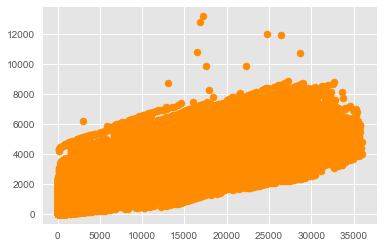

In [84]:
#plt.scatter(X['Distance'],y,color='blue', lable='Data')
#plt.plot(X['Distance'],y_regr_rf, color='red', lable='Random Forest')

plt.scatter(X['Distance'], y, color='darkorange', label='data')
plt.savefig('RF_result.png')


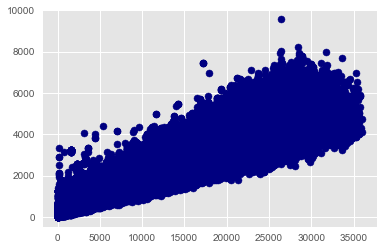

In [85]:
plt.scatter(X['Distance'], y_regr_rf, color='navy', label='MRF model')
#plt.get_backend()

In [86]:
# MAE:  Mean Absolute Error 

# Mean Absolute Error  of linear:  253.761443277
mae = abs(y-regr_rf.predict(X)).mean()
print("Mean Absolute Error of RF ",mae)

Mean Absolute Error of RF  331.047770846


# Train all data with Journey Pattern ID Random Forest 

In [87]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#sklearn.ensemble.RandomForestRegressor
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth,random_state=2)
# Prepare the descriptive features
X = pd.concat([df_all[['Journey_Pattern_ID','Distance','midweek','HourOfDay']]], axis=1)
y = df_all.Trip_Time 

#print("Descriptive features:\n", X)
#print("\nTarget feature:\n", y)

In [88]:
X.dtypes

Journey_Pattern_ID    object
Distance               int64
midweek                int64
HourOfDay              int64
dtype: object

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X.columns.values:
    if X[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X[col]
        le.fit(data.values)
        X[col]=le.transform(X[col])

In [90]:
%time regr_rf.fit(X,y)

CPU times: user 1min 13s, sys: 1.58 s, total: 1min 14s
Wall time: 1min 16s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [91]:
regr_rf.score(X,y)

0.98710536512302793

In [92]:
# MAE:  Mean Absolute Error 
mae = abs(y-regr_rf.predict(X)).mean()
print("Mean Absolute Error of RF ",mae)

Mean Absolute Error of RF  100.326528637


 ## Result comparison of Random Forest 

We checked that train all data with Journey Pattern ID feature, the Random Forest model's mea reduced a lot from 331.05s to 100.32s. As Journey Pattern ID is a categorical feature, it actually helps to improve the accuracy of the modeling. 
